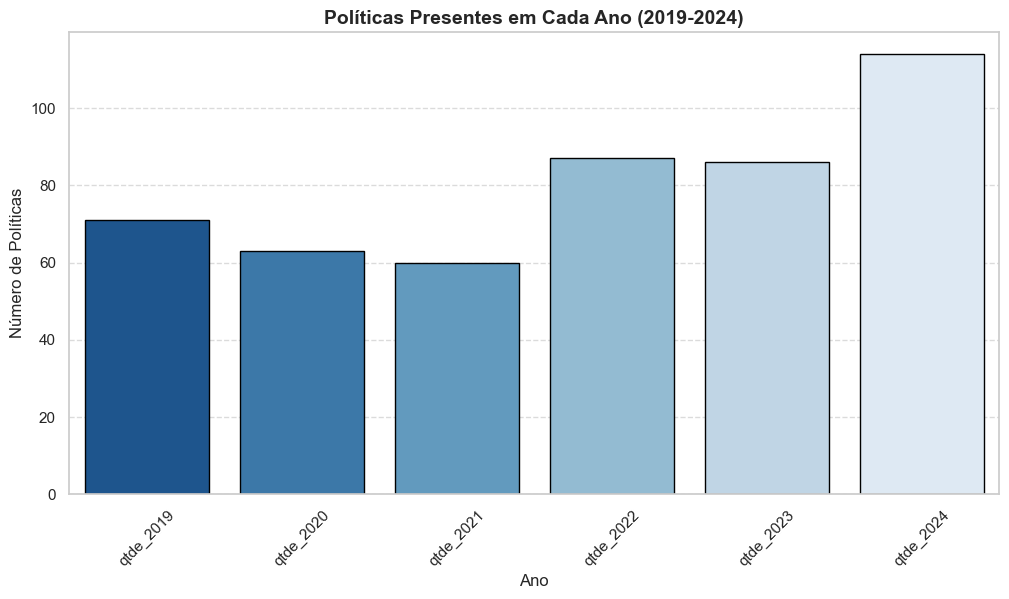

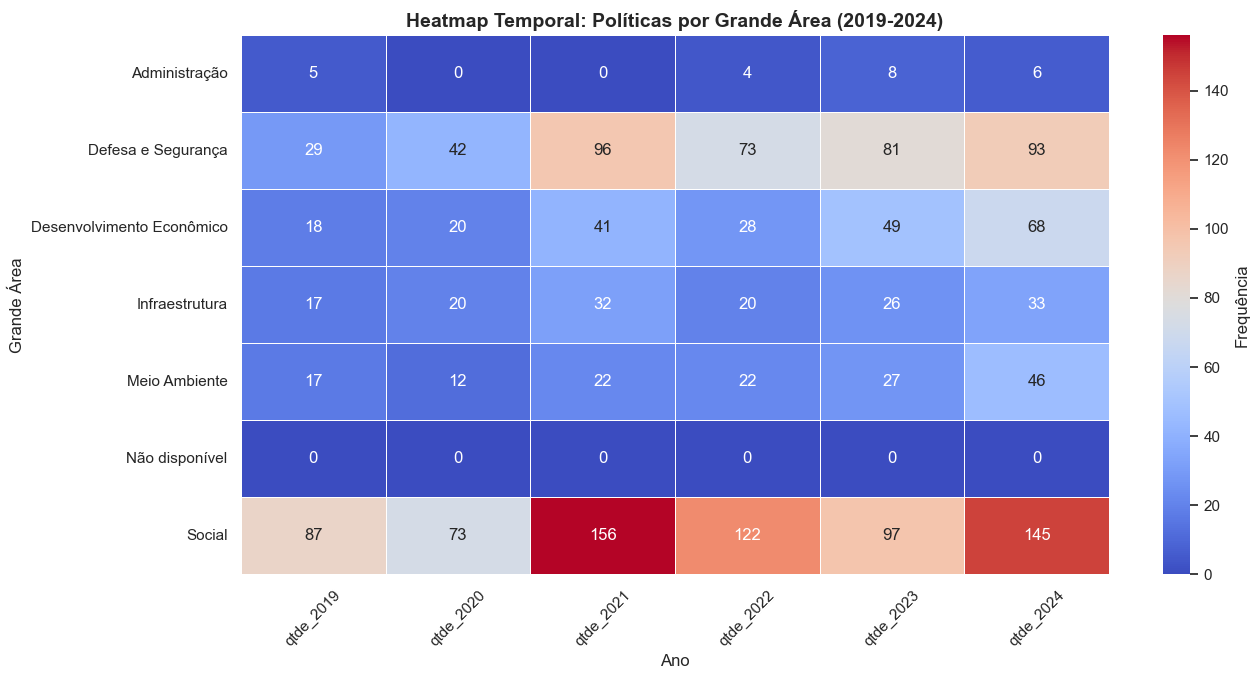

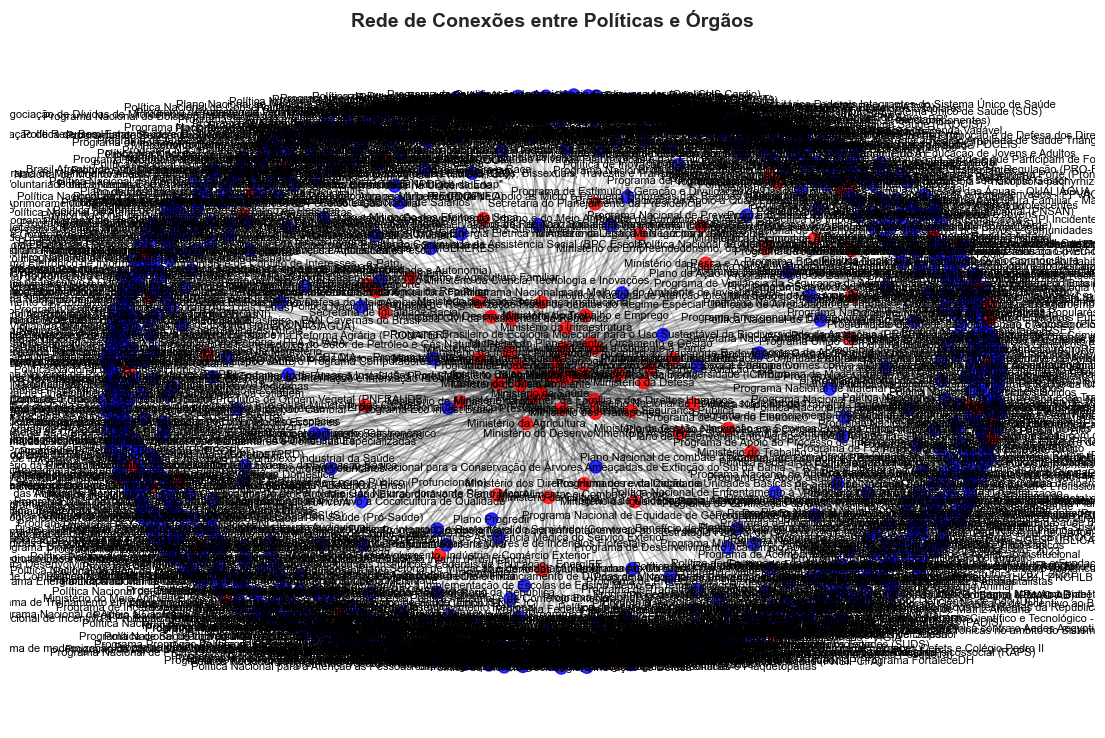


✅ Análises concluídas! Gráficos salvos e dados exportados para 'analise_politicas.xlsx'.


In [11]:
# Instale as bibliotecas necessárias (caso ainda não estejam instaladas)
# !pip install pandas seaborn matplotlib networkx chardet

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# ==========================
# LEITURA DOS DADOS
# ==========================

# Caminho do arquivo consolidado
file_path = "G:\\Meu Drive\\IPEA\\Consulta_autom\\consolidado_politicas_atualizado.csv"

# Carregar os dados
df = pd.read_csv(file_path, encoding="utf-8-sig", low_memory=False)

# ==========================
# PADRONIZAÇÃO DOS DADOS
# ==========================

# Remover espaços extras das colunas e valores de texto
df.columns = df.columns.str.strip()
df["politica"] = df["politica"].str.strip()

# Converter colunas de datas
df["ano_politica"] = pd.to_numeric(df["ano_politica"], errors="coerce").fillna(0).astype("Int64")
df["vigencia_inicio"] = pd.to_datetime(df["vigencia_inicio"], errors="coerce")
df["vigencia_fim"] = pd.to_datetime(df["vigencia_fim"], errors="coerce")

# Identificar colunas numéricas (qtde_aaaa)
colunas_numericas = [col for col in df.columns if col.startswith("qtde_")]

# Criar coluna de total de ocorrências por política
df["total_ocorrencias"] = df[colunas_numericas].sum(axis=1)

# Criar coluna binária indicando se a política aparece em algum ano
df["aparece_em_algum_ano"] = df["total_ocorrencias"] > 0

# ==========================
# ANÁLISES ESTATÍSTICAS
# ==========================

# Estatísticas descritivas das colunas numéricas
estatisticas_descritivas = df[colunas_numericas].describe().T

# Contagem de políticas que aparecem em cada ano
presenca_por_ano = (df[colunas_numericas] > 0).sum()

# ==========================
# VISUALIZAÇÕES OTIMIZADAS
# ==========================

# Configuração do estilo do Seaborn
sns.set_theme(style="whitegrid", palette="pastel")

# 📊 1. Gráfico de Barras - Políticas por Ano (Melhorado)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=presenca_por_ano.index, y=presenca_por_ano.values, palette="Blues_r", edgecolor="black")
plt.title("Políticas Presentes em Cada Ano (2019-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Políticas", fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Salvar o gráfico
plt.savefig("grafico_politicas_por_ano.png", dpi=300, bbox_inches="tight")
plt.show()

# 📊 2. Heatmap Temporal de Políticas por Grande Área (Mais Legível)
df_heatmap = df.pivot_table(index="grande_area", values=colunas_numericas, aggfunc="sum")

plt.figure(figsize=(14, 7))
sns.heatmap(df_heatmap, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Frequência'})
plt.title("Heatmap Temporal: Políticas por Grande Área (2019-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Grande Área", fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Salvar o gráfico
plt.savefig("heatmap_politicas.png", dpi=300, bbox_inches="tight")
plt.show()

# 📊 3. Rede de Conexões - Políticas e Órgãos (Melhor Visualização)
G = nx.Graph()

# Adicionar nós das políticas e órgãos
for _, row in df.iterrows():
    if pd.notna(row.get("orgao_nome", None)):  # Verificar se há órgão associado
        G.add_node(row["politica"], type="politica")
        G.add_node(row["orgao_nome"], type="orgao")
        G.add_edge(row["politica"], row["orgao_nome"])

plt.figure(figsize=(14, 9))
pos = nx.spring_layout(G, k=0.5, seed=42)

# Criar lista de cores para diferenciar os nós
node_colors = ["blue" if G.nodes[n]["type"] == "politica" else "red" for n in G.nodes]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=80, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

plt.title("Rede de Conexões entre Políticas e Órgãos", fontsize=14, fontweight="bold")
plt.axis("off")

# Salvar o gráfico
plt.savefig("rede_politicas_orgaos.png", dpi=300, bbox_inches="tight")
plt.show()

# ==========================
# EXPORTAÇÃO DAS ESTATÍSTICAS PARA EXCEL
# ==========================

# Criar um arquivo Excel com todas as tabelas organizadas
with pd.ExcelWriter("analise_politicas.xlsx", engine="xlsxwriter") as writer:
    estatisticas_descritivas.to_excel(writer, sheet_name="Estatisticas_Descritivas")
    presenca_por_ano.to_frame("Número de Políticas").to_excel(writer, sheet_name="Presença_por_Ano")
    df.to_excel(writer, sheet_name="Base_Consolidada", index=False)

print("\n✅ Análises concluídas! Gráficos salvos e dados exportados para 'analise_politicas.xlsx'.")


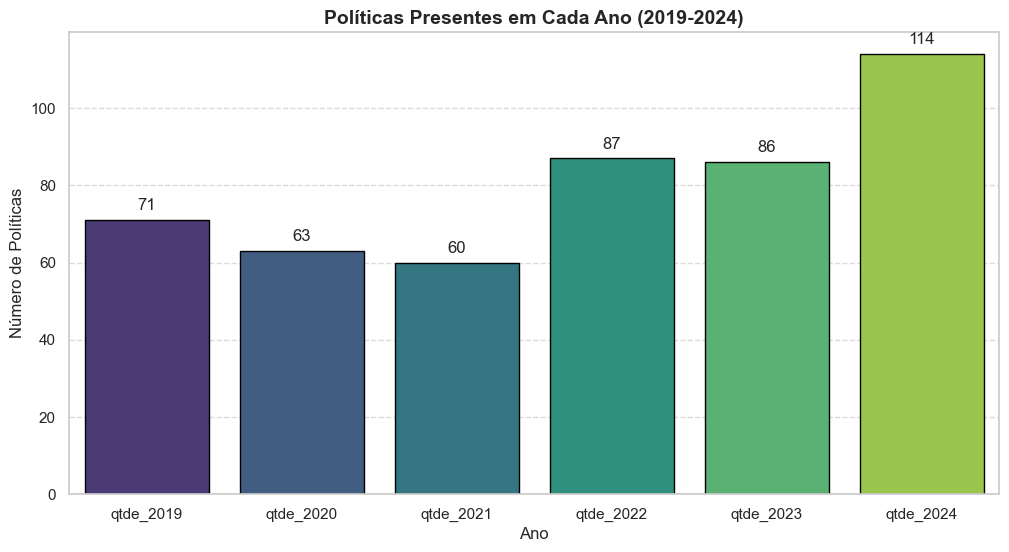

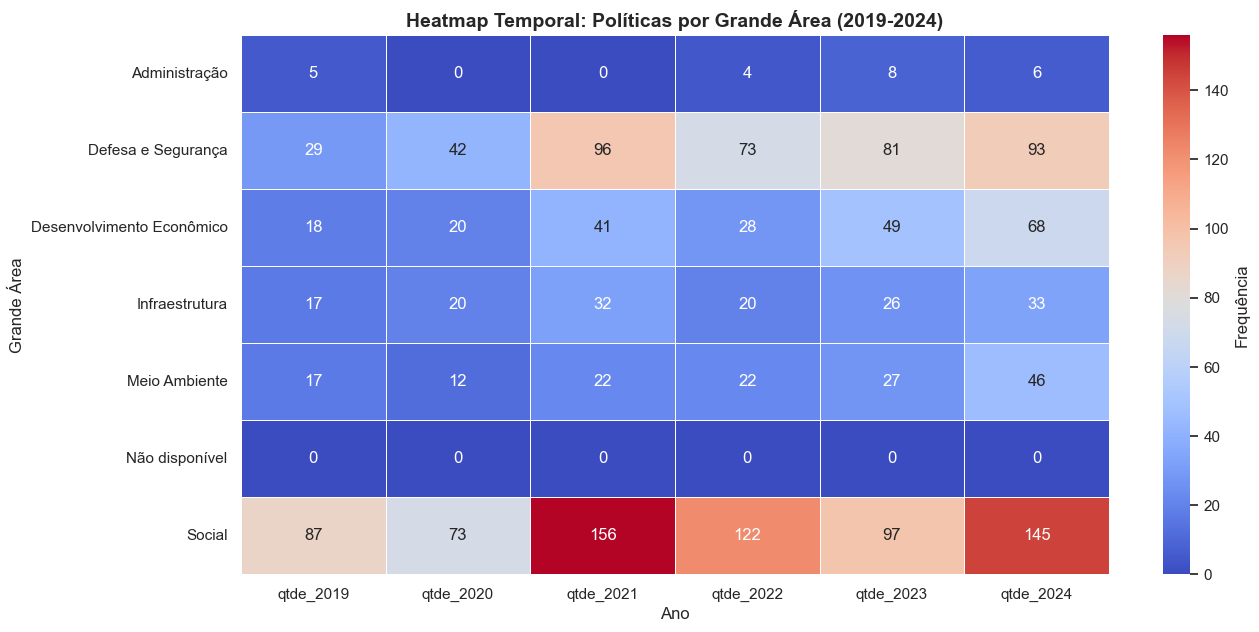

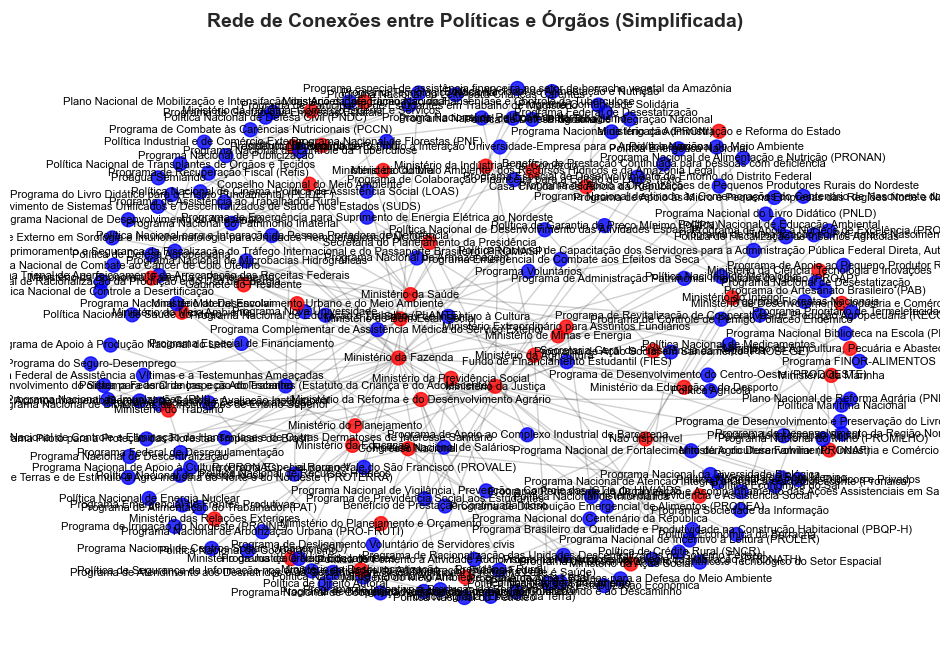

PermissionError: [Errno 13] Permission denied: 'analise_politicas.xlsx'

In [12]:
# Instale as bibliotecas necessárias (caso ainda não estejam instaladas)
# !pip install pandas seaborn matplotlib networkx chardet

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# ==========================
# LEITURA DOS DADOS
# ==========================

# Caminho do arquivo consolidado
file_path = "G:\\Meu Drive\\IPEA\\Consulta_autom\\consolidado_politicas_atualizado.csv"

# Carregar os dados
df = pd.read_csv(file_path, encoding="utf-8-sig", low_memory=False)

# ==========================
# PADRONIZAÇÃO DOS DADOS
# ==========================

# Remover espaços extras das colunas e valores de texto
df.columns = df.columns.str.strip()
df["politica"] = df["politica"].str.strip()

# Converter colunas de datas
df["ano_politica"] = pd.to_numeric(df["ano_politica"], errors="coerce").fillna(0).astype("Int64")
df["vigencia_inicio"] = pd.to_datetime(df["vigencia_inicio"], errors="coerce")
df["vigencia_fim"] = pd.to_datetime(df["vigencia_fim"], errors="coerce")

# Identificar colunas numéricas (qtde_aaaa)
colunas_numericas = [col for col in df.columns if col.startswith("qtde_")]

# Criar coluna de total de ocorrências por política
df["total_ocorrencias"] = df[colunas_numericas].sum(axis=1)

# Criar coluna binária indicando se a política aparece em algum ano
df["aparece_em_algum_ano"] = df["total_ocorrencias"] > 0

# ==========================
# ANÁLISES ESTATÍSTICAS
# ==========================

# Estatísticas descritivas das colunas numéricas
estatisticas_descritivas = df[colunas_numericas].describe().T

# Contagem de políticas que aparecem em cada ano
presenca_por_ano = (df[colunas_numericas] > 0).sum()

# ==========================
# VISUALIZAÇÕES OTIMIZADAS
# ==========================

# Configuração do estilo do Seaborn
sns.set_theme(style="whitegrid", palette="pastel")

# 📊 1. Gráfico de Barras - Políticas por Ano (Melhorado)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=presenca_por_ano.index, y=presenca_por_ano.values, palette="viridis", edgecolor="black")

# Adiciona rótulos nas barras
for i in ax.containers:
    ax.bar_label(i, fmt='%d', fontsize=12, label_type='edge', padding=5)

plt.title("Políticas Presentes em Cada Ano (2019-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Políticas", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Salvar o gráfico
plt.savefig("grafico_politicas_por_ano.png", dpi=300, bbox_inches="tight")
plt.show()

# 📊 2. Heatmap Temporal de Políticas por Grande Área (Melhorado)
df_heatmap = df.pivot_table(index="grande_area", values=colunas_numericas, aggfunc="sum")

plt.figure(figsize=(14, 7))
sns.heatmap(df_heatmap, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Frequência'})
plt.title("Heatmap Temporal: Políticas por Grande Área (2019-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Grande Área", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

# Salvar o gráfico
plt.savefig("heatmap_politicas.png", dpi=300, bbox_inches="tight")
plt.show()

# 📊 3. Rede de Conexões - Políticas e Órgãos (Melhor Visualização)
G = nx.Graph()

# Adicionar nós das políticas e órgãos
for _, row in df.iterrows():
    if pd.notna(row.get("orgao_nome", None)):  # Verificar se há órgão associado
        G.add_node(row["politica"], type="politica")
        G.add_node(row["orgao_nome"], type="orgao")
        G.add_edge(row["politica"], row["orgao_nome"])

# Reduzindo densidade da rede
subgraph_nodes = list(G.nodes)[:200]  # Exibir apenas os 200 primeiros nós para evitar poluição visual
G_sub = G.subgraph(subgraph_nodes)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_sub, k=0.6, seed=42)

# Criar lista de cores para diferenciar os nós
node_colors = ["blue" if G_sub.nodes[n]["type"] == "politica" else "red" for n in G_sub.nodes]

nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=100, alpha=0.8)
nx.draw_networkx_edges(G_sub, pos, alpha=0.2)
nx.draw_networkx_labels(G_sub, pos, font_size=8, font_color="black")

plt.title("Rede de Conexões entre Políticas e Órgãos (Simplificada)", fontsize=14, fontweight="bold")
plt.axis("off")

# Salvar o gráfico
plt.savefig("rede_politicas_orgaos.png", dpi=300, bbox_inches="tight")
plt.show()

# ==========================
# EXPORTAÇÃO DAS ESTATÍSTICAS PARA EXCEL
# ==========================

# Criar um arquivo Excel com todas as tabelas organizadas
with pd.ExcelWriter("analise_politicas.xlsx", engine="xlsxwriter") as writer:
    estatisticas_descritivas.to_excel(writer, sheet_name="Estatisticas_Descritivas")
    presenca_por_ano.to_frame("Número de Políticas").to_excel(writer, sheet_name="Presença_por_Ano")
    df.to_excel(writer, sheet_name="Base_Consolidada", index=False)

print("\n✅ Análises concluídas! Gráficos salvos e dados exportados para 'analise_politicas.xlsx'.")


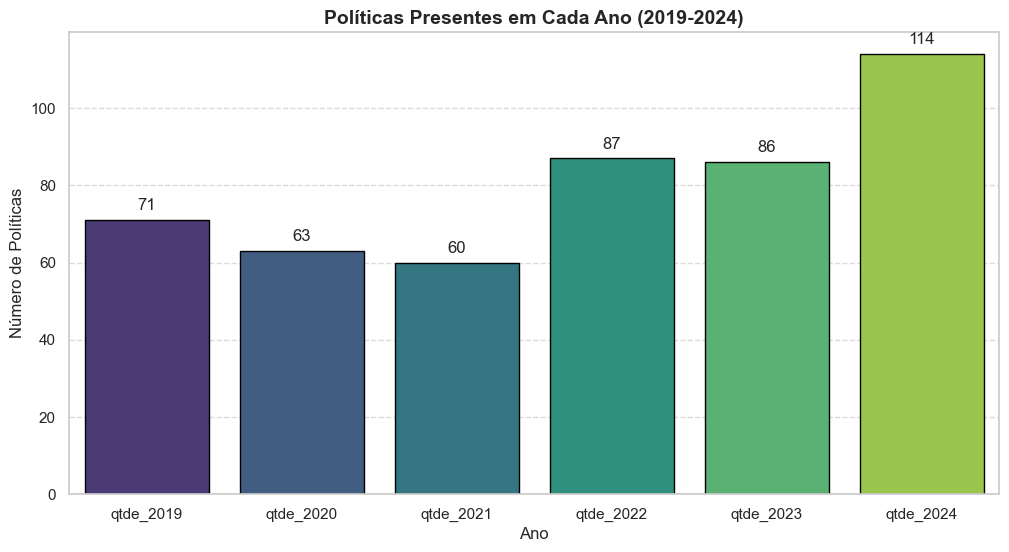

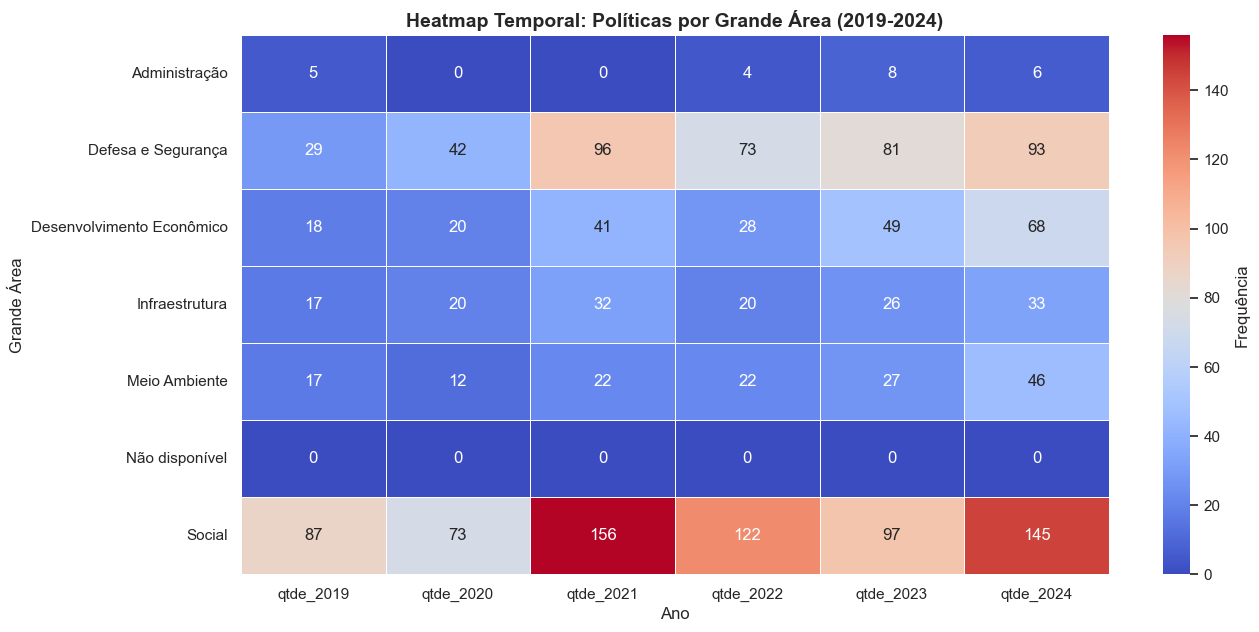

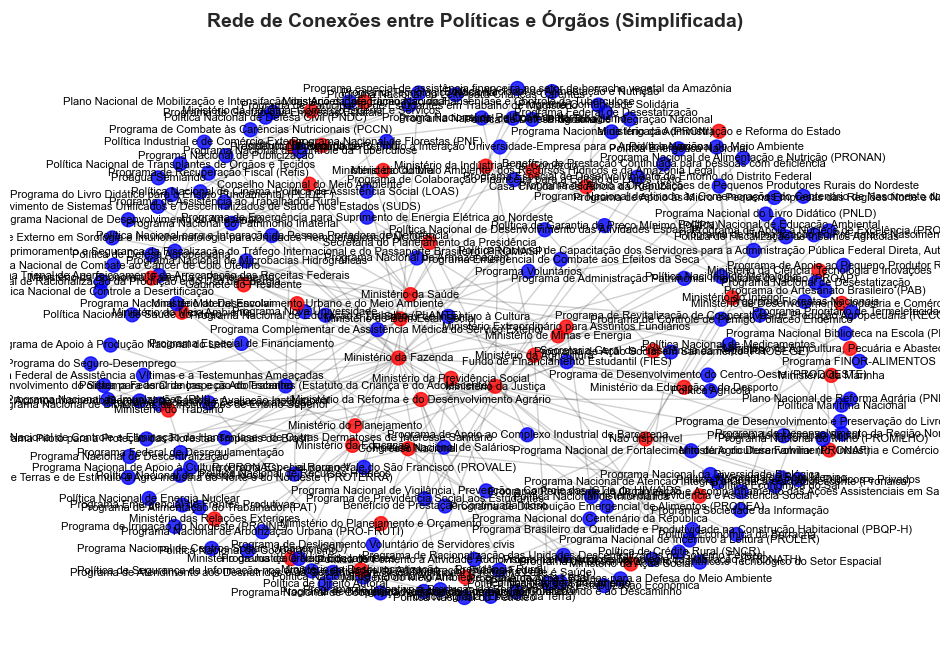


✅ Análises concluídas! Gráficos salvos e dados exportados para 'analise_politicas.xlsx'.


In [13]:
# Instale as bibliotecas necessárias (caso ainda não estejam instaladas)
# !pip install pandas seaborn matplotlib networkx chardet

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# ==========================
# LEITURA DOS DADOS
# ==========================

# Caminho do arquivo consolidado
file_path = "G:\\Meu Drive\\IPEA\\Consulta_autom\\consolidado_politicas_atualizado.csv"

# Carregar os dados
df = pd.read_csv(file_path, encoding="utf-8-sig", low_memory=False)

# ==========================
# PADRONIZAÇÃO DOS DADOS
# ==========================

# Remover espaços extras das colunas e valores de texto
df.columns = df.columns.str.strip()
df["politica"] = df["politica"].str.strip()

# Converter colunas de datas
df["ano_politica"] = pd.to_numeric(df["ano_politica"], errors="coerce").fillna(0).astype("Int64")
df["vigencia_inicio"] = pd.to_datetime(df["vigencia_inicio"], errors="coerce")
df["vigencia_fim"] = pd.to_datetime(df["vigencia_fim"], errors="coerce")

# Identificar colunas numéricas (qtde_aaaa)
colunas_numericas = [col for col in df.columns if col.startswith("qtde_")]

# Criar coluna de total de ocorrências por política
df["total_ocorrencias"] = df[colunas_numericas].sum(axis=1)

# Criar coluna binária indicando se a política aparece em algum ano
df["aparece_em_algum_ano"] = df["total_ocorrencias"] > 0

# ==========================
# ANÁLISES ESTATÍSTICAS
# ==========================

# Estatísticas descritivas das colunas numéricas
estatisticas_descritivas = df[colunas_numericas].describe().T

# Contagem de políticas que aparecem em cada ano
presenca_por_ano = (df[colunas_numericas] > 0).sum()

# ==========================
# VISUALIZAÇÕES OTIMIZADAS
# ==========================

# Configuração do estilo do Seaborn
sns.set_theme(style="whitegrid", palette="pastel")

# 📊 1. Gráfico de Barras - Políticas por Ano (Melhorado)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=presenca_por_ano.index, y=presenca_por_ano.values, palette="viridis", edgecolor="black")

# Adiciona rótulos nas barras
for i in ax.containers:
    ax.bar_label(i, fmt='%d', fontsize=12, label_type='edge', padding=5)

plt.title("Políticas Presentes em Cada Ano (2019-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Políticas", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Salvar o gráfico
plt.savefig("grafico_politicas_por_ano.png", dpi=300, bbox_inches="tight")
plt.show()

# 📊 2. Heatmap Temporal de Políticas por Grande Área (Melhorado)
df_heatmap = df.pivot_table(index="grande_area", values=colunas_numericas, aggfunc="sum")

plt.figure(figsize=(14, 7))
sns.heatmap(df_heatmap, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Frequência'})
plt.title("Heatmap Temporal: Políticas por Grande Área (2019-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Grande Área", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

# Salvar o gráfico
plt.savefig("heatmap_politicas.png", dpi=300, bbox_inches="tight")
plt.show()

# 📊 3. Rede de Conexões - Políticas e Órgãos (Melhor Visualização)
G = nx.Graph()

# Adicionar nós das políticas e órgãos
for _, row in df.iterrows():
    if pd.notna(row.get("orgao_nome", None)):  # Verificar se há órgão associado
        G.add_node(row["politica"], type="politica")
        G.add_node(row["orgao_nome"], type="orgao")
        G.add_edge(row["politica"], row["orgao_nome"])

# Reduzindo densidade da rede
subgraph_nodes = list(G.nodes)[:200]  # Exibir apenas os 200 primeiros nós para evitar poluição visual
G_sub = G.subgraph(subgraph_nodes)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_sub, k=0.6, seed=42)

# Criar lista de cores para diferenciar os nós
node_colors = ["blue" if G_sub.nodes[n]["type"] == "politica" else "red" for n in G_sub.nodes]

nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=100, alpha=0.8)
nx.draw_networkx_edges(G_sub, pos, alpha=0.2)
nx.draw_networkx_labels(G_sub, pos, font_size=8, font_color="black")

plt.title("Rede de Conexões entre Políticas e Órgãos (Simplificada)", fontsize=14, fontweight="bold")
plt.axis("off")

# Salvar o gráfico
plt.savefig("rede_politicas_orgaos.png", dpi=300, bbox_inches="tight")
plt.show()

# ==========================
# EXPORTAÇÃO DAS ESTATÍSTICAS PARA EXCEL
# ==========================

# Criar um arquivo Excel com todas as tabelas organizadas
with pd.ExcelWriter("analise_politicas.xlsx", engine="xlsxwriter") as writer:
    estatisticas_descritivas.to_excel(writer, sheet_name="Estatisticas_Descritivas")
    presenca_por_ano.to_frame("Número de Políticas").to_excel(writer, sheet_name="Presença_por_Ano")
    df.to_excel(writer, sheet_name="Base_Consolidada", index=False)

print("\n✅ Análises concluídas! Gráficos salvos e dados exportados para 'analise_politicas.xlsx'.")


C:\Users\SAULO\AppData\Local\Temp\ipykernel_9520\378110823.py:38: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\SAULO\AppData\Local\Temp\ipykernel_9520\378110823.py:87: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\Users\SAULO\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



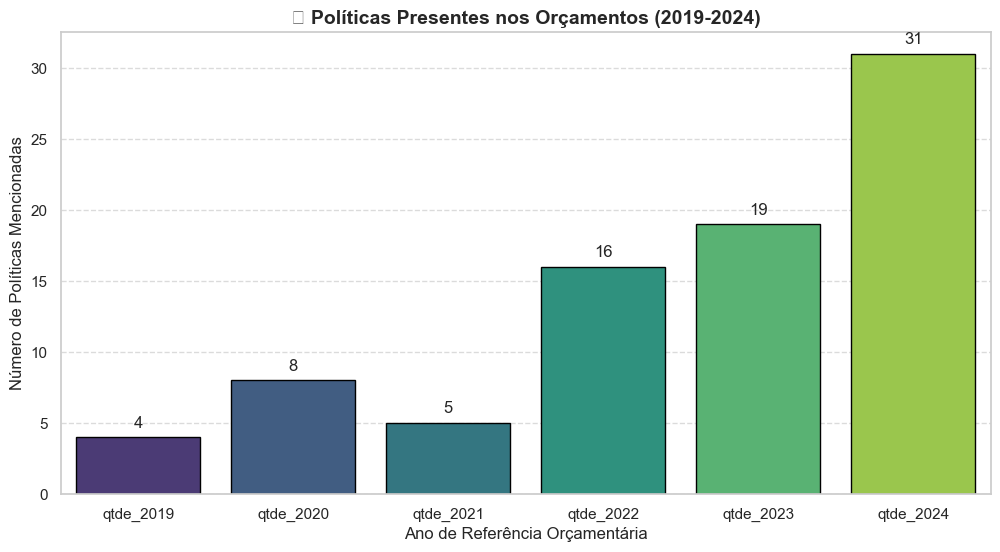

C:\Users\SAULO\AppData\Local\Temp\ipykernel_9520\378110823.py:102: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\Users\SAULO\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



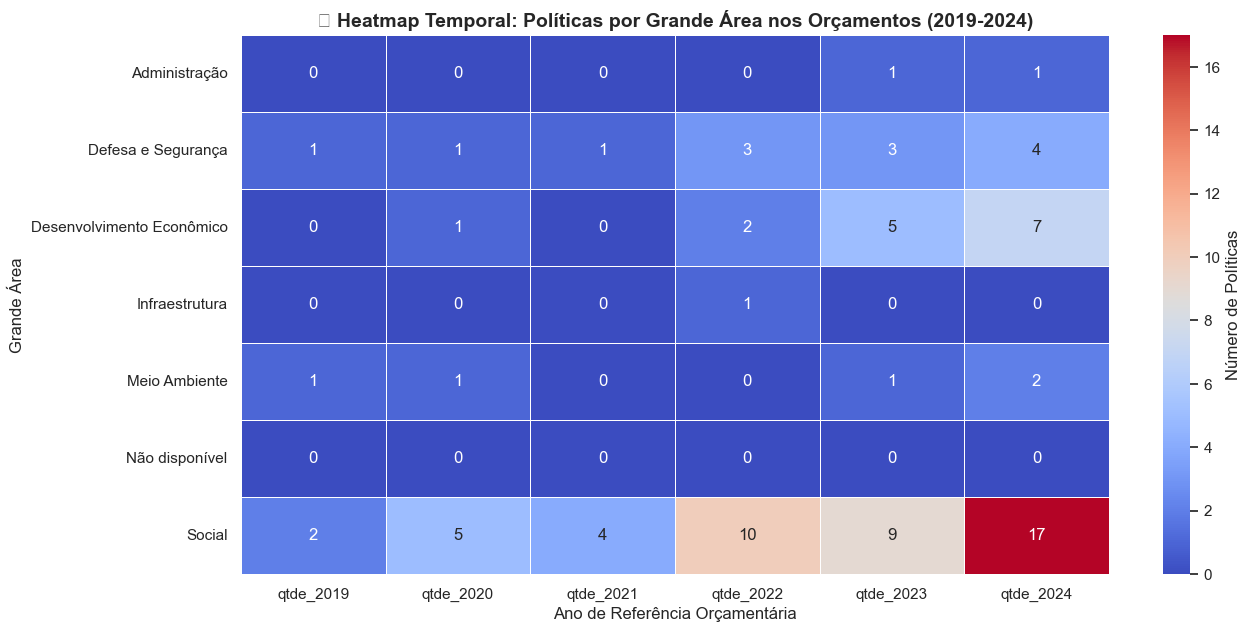


✅ Análises concluídas! Gráficos salvos e dados exportados para 'analise_politicas_2019_2024.xlsx'.


In [18]:
# Instale as bibliotecas necessárias (caso ainda não estejam instaladas)
# !pip install pandas seaborn matplotlib networkx openpyxl

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# ==========================
# LEITURA DOS DADOS
# ==========================

# Caminho do arquivo consolidado
file_path = "G:\\Meu Drive\\IPEA\\Consulta_autom\\consolidado_politicas_atualizado.csv"

# Carregar os dados
df = pd.read_csv(file_path, encoding="utf-8-sig", low_memory=False)

# ==========================
# FILTRAGEM DE POLÍTICAS ENTRE 2019-2024
# ==========================

# Converter 'ano_politica' para numérico e filtrar de 2019 a 2024
df["ano_politica"] = pd.to_numeric(df["ano_politica"], errors="coerce")
df = df[(df["ano_politica"] >= 2019) & (df["ano_politica"] <= 2024)]

# ==========================
# PADRONIZAÇÃO DOS DADOS
# ==========================

# Remover espaços extras nas colunas e valores de texto
df.columns = df.columns.str.strip()
df["politica"] = df["politica"].str.strip()

# Converter colunas de datas
df["vigencia_inicio"] = pd.to_datetime(df["vigencia_inicio"], errors="coerce")
df["vigencia_fim"] = pd.to_datetime(df["vigencia_fim"], errors="coerce")

# Identificar colunas numéricas (qtde_aaaa)
colunas_numericas = [col for col in df.columns if col.startswith("qtde_")]

# Criar uma versão binária para destacar se a política foi mencionada em cada ano (1 para presença, 0 para ausência)
df_binario = df[colunas_numericas].apply(lambda x: (x > 0).astype(int))
df_binario["politica"] = df["politica"]

# Criar coluna de total de ocorrências por política
df["total_ocorrencias"] = df[colunas_numericas].sum(axis=1)

# Criar coluna binária indicando se a política aparece em algum ano
df["aparece_em_algum_ano"] = df["total_ocorrencias"] > 0

# ==========================
# ANÁLISES ESTATÍSTICAS
# ==========================

# Estatísticas descritivas das colunas numéricas
estatisticas_descritivas = df[colunas_numericas].describe().T

# Contagem de políticas que aparecem em cada ano
presenca_por_ano = (df[colunas_numericas] > 0).sum()

# ==========================
# VISUALIZAÇÕES OTIMIZADAS
# ==========================

# Configuração do estilo do Seaborn
sns.set_theme(style="whitegrid", palette="pastel")

# 📊 1. Gráfico de Barras - Políticas por Ano
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=presenca_por_ano.index, y=presenca_por_ano.values, palette="viridis", edgecolor="black")

# Adicionar rótulos nas barras
for i in ax.containers:
    ax.bar_label(i, fmt='%d', fontsize=12, label_type='edge', padding=5)

plt.title("📊 Políticas Presentes nos Orçamentos (2019-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Ano de Referência Orçamentária", fontsize=12)
plt.ylabel("Número de Políticas Mencionadas", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Salvar o gráfico
plt.savefig("grafico_politicas_presenca_ano.png", dpi=300, bbox_inches="tight")
plt.show()

# 📊 2. Heatmap - Políticas por Grande Área (Baseado na Presença nos Orçamentos)
df_heatmap = df.pivot_table(index="grande_area", values=colunas_numericas, aggfunc=lambda x: (x > 0).sum())

plt.figure(figsize=(14, 7))
sns.heatmap(df_heatmap, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Número de Políticas'})
plt.title("📊 Heatmap Temporal: Políticas por Grande Área nos Orçamentos (2019-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Ano de Referência Orçamentária", fontsize=12)
plt.ylabel("Grande Área", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

# Salvar o gráfico
plt.savefig("heatmap_politicas_orcamento.png", dpi=300, bbox_inches="tight")
plt.show()



# ==========================
# EXPORTAÇÃO DAS ESTATÍSTICAS PARA EXCEL
# ==========================

# Criar um arquivo Excel com todas as tabelas organizadas
with pd.ExcelWriter("analise_politicas_2019_2024.xlsx", engine="openpyxl") as writer:
    estatisticas_descritivas.to_excel(writer, sheet_name="Estatisticas_Descritivas")
    presenca_por_ano.to_frame("Número de Políticas").to_excel(writer, sheet_name="Presença_por_Ano")
    df.to_excel(writer, sheet_name="Base_Consolidada", index=False)

print("\n✅ Análises concluídas! Gráficos salvos e dados exportados para 'analise_politicas_2019_2024.xlsx'.")
